In [56]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import levene
%matplotlib inline

In [2]:
df=pd.read_csv('bank-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#drop balance column as no info is provided regarding the same
df.drop(columns=['balance'],axis=1,inplace=True)

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [7]:
df.groupby(['Target']).count()
#there is a class imbalance problem.Probablity of correctly  Classifying the records belonging to Target class 'no' will be high.
#Also we can see there are  outliers in most of the attributes.


,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,
no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


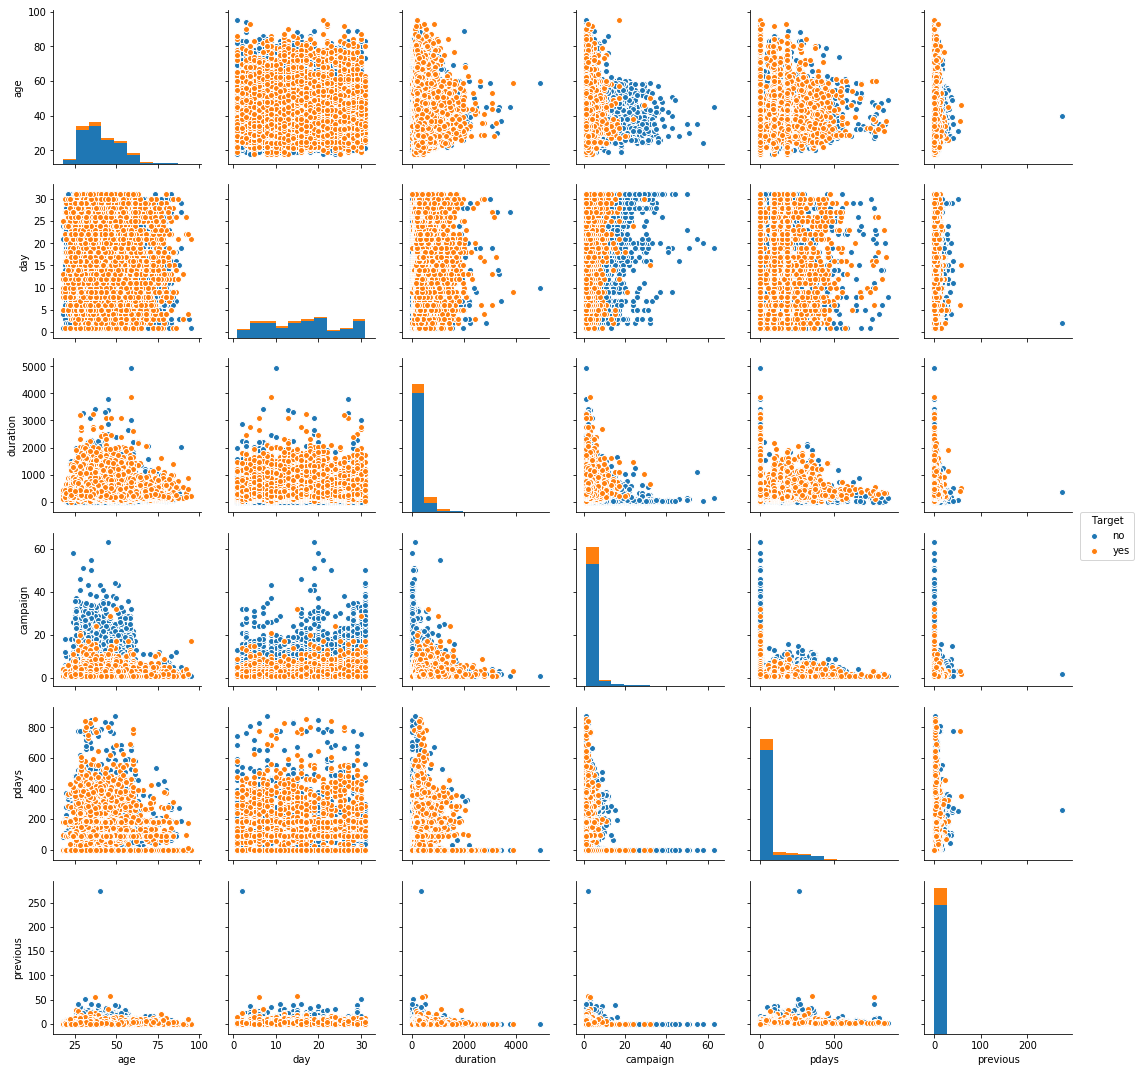

In [8]:
sns.pairplot(df,hue='Target')
# As we can see that there is exists no corelation between the continuous variables. Also distribution of  continuous variable is not normal

In [9]:
cor=df.corr()
print(cor)

               age       day  duration  campaign     pdays  previous
age       1.000000 -0.009120 -0.004648  0.004760 -0.023758  0.001288
day      -0.009120  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288 -0.051710  0.001203 -0.032855  0.454820  1.000000


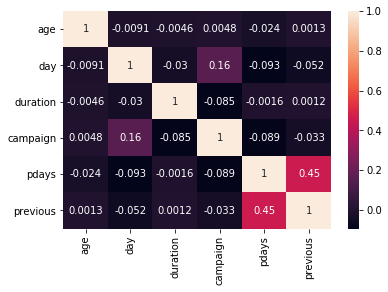

In [10]:
sns.heatmap(cor,annot=True)
# as we can see that there doesn't exists corelation between independent attributes

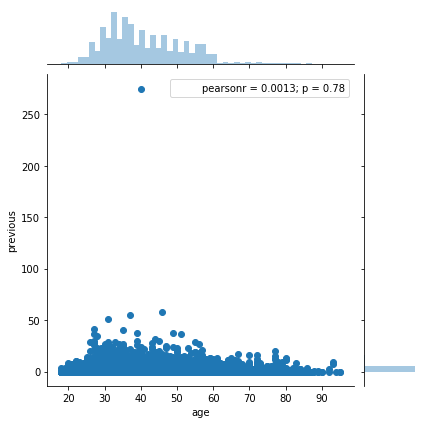

In [11]:
sns.jointplot('age','previous',data=df)

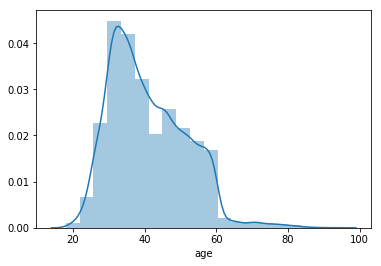

In [12]:
sns.distplot(df['age'],bins=20)

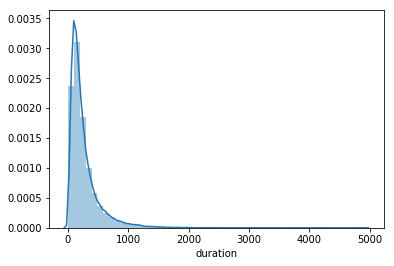

In [13]:
sns.distplot(df['duration'])

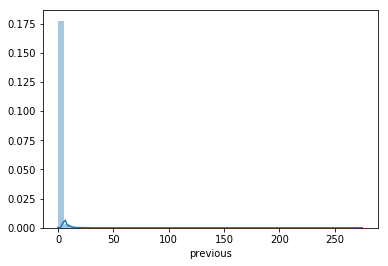

In [14]:
sns.distplot(df['previous'])

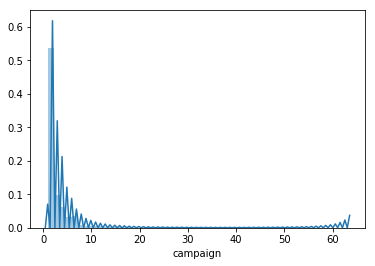

In [15]:
sns.distplot(df['campaign'])

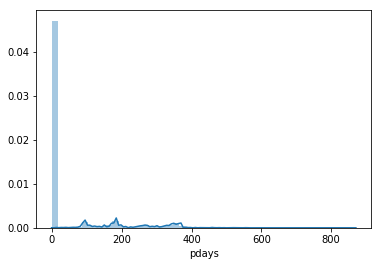

In [16]:
sns.distplot(df['pdays'])

In [17]:
# here shapiro test cannot be used to test normality of continuous attributes as number of samples are greates than 5000

In [38]:
import numpy as np

In [18]:
df.head()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [48]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'Target'],
      dtype='object')

In [61]:
pd.pivot_table(data=df,index=['education'],aggfunc='count')

,Target,age,campaign,contact,day,default,duration,housing,job,loan,marital,month,pdays,poutcome,previous
education,,,,,,,,,,,,,,,
primary,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851
secondary,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202
tertiary,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301
unknown,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857


In [62]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature]).codes # Replace strings with an integer

In [65]:
df.head()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,0,0,2,5,8,198,1,-1,0,3,0


In [68]:
y=df['Target']
X=df.ix[:,0:-1]

In [71]:
from sklearn.model_selection import train_test_split

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [118]:
model=DecisionTreeClassifier(criterion='entropy')

In [119]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [120]:
model.score(X_test,y_test)

0.8750368622825125

In [121]:
model.score(X_train,y_train)

1.0

In [124]:
#If we don't regularize the model,then it leads to overfitting of model
#let's check the test and train score by setting depth parameter
model_regularized=DecisionTreeClassifier(criterion='entropy',max_depth=10)
model_regularized.fit(X_train,y_train)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [125]:
model_regularized.score(X_test,y_test)

0.8936891772338543

In [126]:
model_regularized.score(X_train,y_train)

0.9225203020823459

In [86]:
##Using RandomForestClassifier

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
for n in range(3,20):
    RF_model=RandomForestClassifier(n_estimators=n,max_depth=10)
    RF_model.fit(X_train, y_train)
    print("for {} estimator,the train score for model:{} and test score for model:{}".format(n,RF_model.score(X_train,y_train),RF_model.score(X_test,y_test)))
    

for 3 estimator,the train score for model:0.9182544948968306 and test score for model:0.896638159834857
for 4 estimator,the train score for model:0.913167124845957 and test score for model:0.8939103509289296
for 5 estimator,the train score for model:0.9214143520712864 and test score for model:0.8969330580949573
for 6 estimator,the train score for model:0.9180017063228743 and test score for model:0.8975965791801829
for 7 estimator,the train score for model:0.9233418649477043 and test score for model:0.9001032143910351
for 8 estimator,the train score for model:0.9218883306474548 and test score for model:0.8975228546151578
for 9 estimator,the train score for model:0.9228046892280469 and test score for model:0.9003243880861103
for 10 estimator,the train score for model:0.9250165892501659 and test score for model:0.9020200530816869
for 11 estimator,the train score for model:0.924511012102253 and test score for model:0.8992185196107343
for 12 estimator,the train score for model:0.92334186494

In [92]:
#As we can see from the above result, RandomForestClassifier gives better score on train and test for n=11,15,17,18

In [93]:
#Gradient Boosting

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

In [108]:
for n in range(5,20):
    gbcl = GradientBoostingClassifier(n_estimators = n, learning_rate = 0.09, max_depth=10)
    gbcl.fit(X_train, y_train)
    print("for {} estimator,the train score for model:{} and test score for model:{}".format(n,gbcl.score(X_train,y_train),gbcl.score(X_test,y_test)))

for 5 estimator,the train score for model:0.8838120516952633 and test score for model:0.8821881450899439
for 6 estimator,the train score for model:0.8942079817992227 and test score for model:0.884473606605721
for 7 estimator,the train score for model:0.9038455461813126 and test score for model:0.8865378944264228
for 8 estimator,the train score for model:0.9135463077068916 and test score for model:0.8897080507225007
for 9 estimator,the train score for model:0.9220463235061775 and test score for model:0.8914037157180773
for 10 estimator,the train score for model:0.9298195721553386 and test score for model:0.8916986139781775
for 11 estimator,the train score for model:0.9368028565108857 and test score for model:0.8927307578885284
for 12 estimator,the train score for model:0.9400891079723197 and test score for model:0.8943526983190799
for 13 estimator,the train score for model:0.9439441337251556 and test score for model:0.893320554408729
for 14 estimator,the train score for model:0.94735677